In [1]:
### Code is a reimplementation of work done from this article: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

### Load Packages
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

from time import time
from torchvision import datasets, transforms
from torch import nn, optim



In [2]:
# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data, applying transformation
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)

###

In [5]:
# Define the neural network architecture using PyTorch's nn module
input_size = 784  # Number of input features (28x28 images flattened)
hidden_sizes = [128, 64]  # Number of neurons in hidden layers
output_size = 10  # Number of output classes (digits 0-9)

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),  # Input layer
    nn.ReLU(),  # Activation function (Rectified Linear Unit)
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # Hidden layer 1
    nn.ReLU(),  # Activation function
    nn.Linear(hidden_sizes[1], output_size),  # Output layer
    nn.LogSoftmax(dim=1)  # Log softmax for classification
)

In [9]:
# Define the loss function (negative log-likelihood loss)
criterion = nn.NLLLoss()

# Prepare the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


In [12]:
# Training loop
optimizer.zero_grad()  # Clear gradients
output = model(images.view(images.shape[0], -1))  # Forward pass
loss = criterion(output, labels)  # Compute loss
loss.backward()  # Backpropagation
optimizer.step()  # Update weights
time0 = time()  # Set time
epochs = 15  # Set number of epochs

# Training loop over multiple epochs
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-long vector
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()  # Clear gradients
        output = model(images)  # Forward pass
        loss = criterion(output, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.04265163529034791
Epoch 1 - Training loss: 0.03992488974683495
Epoch 2 - Training loss: 0.03764352881198705
Epoch 3 - Training loss: 0.03571804902970052
Epoch 4 - Training loss: 0.033441107712938255
Epoch 5 - Training loss: 0.031505846160663556
Epoch 6 - Training loss: 0.02975103771487779
Epoch 7 - Training loss: 0.027797785112266934
Epoch 8 - Training loss: 0.026008469290035502
Epoch 9 - Training loss: 0.024786752410546276
Epoch 10 - Training loss: 0.023147008655695064
Epoch 11 - Training loss: 0.022384802768836472
Epoch 12 - Training loss: 0.020502895529410228
Epoch 13 - Training loss: 0.019446145126428296
Epoch 14 - Training loss: 0.018184996846785793

Training Time (in minutes) = 1.2362915356953939


In [13]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9789


In [14]:
###  Problem 1-C
train_losses = []
epochs = 50

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    print("Epoch {} - Training loss: {}".format(e, train_loss))


Epoch 0 - Training loss: 0.017650994102419444
Epoch 1 - Training loss: 0.015724622332284957
Epoch 2 - Training loss: 0.015541940626166047
Epoch 3 - Training loss: 0.014800801719341533
Epoch 4 - Training loss: 0.013778137546354112
Epoch 5 - Training loss: 0.012823910100790394
Epoch 6 - Training loss: 0.011623407682762104
Epoch 7 - Training loss: 0.011135437447991746
Epoch 8 - Training loss: 0.010677187061434968
Epoch 9 - Training loss: 0.009801578523906649
Epoch 10 - Training loss: 0.00969461578636744
Epoch 11 - Training loss: 0.009024554409608214
Epoch 12 - Training loss: 0.008436713201051672
Epoch 13 - Training loss: 0.0077744370067412945
Epoch 14 - Training loss: 0.007363794032323695
Epoch 15 - Training loss: 0.006882719628719254
Epoch 16 - Training loss: 0.006458676248011407
Epoch 17 - Training loss: 0.006250275372783083
Epoch 18 - Training loss: 0.006095877512040903
Epoch 19 - Training loss: 0.0055521219983968246
Epoch 20 - Training loss: 0.005204173296800197
Epoch 21 - Training lo

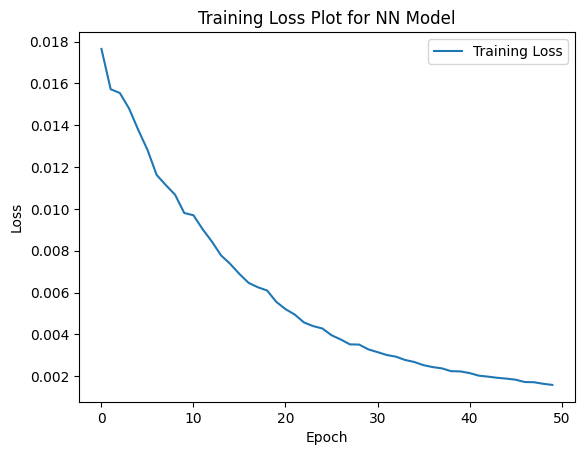

In [15]:
plt.plot(train_losses, label='Training Loss')
plt.title("Training Loss Plot for NN Model")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
### Problem 1-E

# Define the neural network architecture using PyTorch's nn module
input_size = 784  # Number of input features (28x28 images flattened)
hidden_sizes = [256, 128]  # Number of neurons in hidden layers
output_size = 10  # Number of output classes (digits 0-9)

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),  # Input layer
    nn.ReLU(),  # Activation function (Rectified Linear Unit)
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # Hidden layer 1
    nn.ReLU(),  # Activation function
    nn.Linear(hidden_sizes[1], output_size),  # Output layer
    nn.LogSoftmax(dim=1)  # Log softmax for classification
)

# Training loop
train_losses = []
epochs = 50

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    print("Epoch {} - Training loss: {}".format(e, train_loss))

Epoch 0 - Training loss: 2.303968597830994
Epoch 1 - Training loss: 2.3039573461516327
Epoch 2 - Training loss: 2.3039610317266828
Epoch 3 - Training loss: 2.303962084021904
Epoch 4 - Training loss: 2.303956223957574
Epoch 5 - Training loss: 2.3039729366424497
Epoch 6 - Training loss: 2.3039534066531706
Epoch 7 - Training loss: 2.303957082569472
Epoch 8 - Training loss: 2.3039496763428646
Epoch 9 - Training loss: 2.303968734070182
Epoch 10 - Training loss: 2.303956488556445
Epoch 11 - Training loss: 2.303944453501752
Epoch 12 - Training loss: 2.3039610973045006
Epoch 13 - Training loss: 2.3039637298217968
Epoch 14 - Training loss: 2.3039642948585786
Epoch 15 - Training loss: 2.303964666212037
Epoch 16 - Training loss: 2.303959822349711
Epoch 17 - Training loss: 2.3039774653245644
Epoch 18 - Training loss: 2.3039673152508766
Epoch 19 - Training loss: 2.3039640859246
Epoch 20 - Training loss: 2.3039695024490356
Epoch 21 - Training loss: 2.303967847752927
Epoch 22 - Training loss: 2.30396

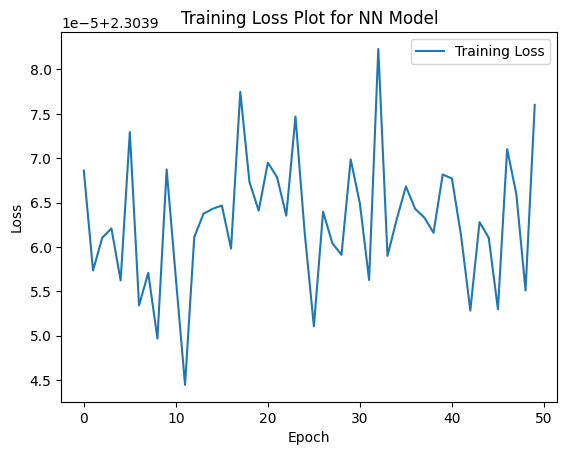

In [23]:
plt.plot(train_losses, label='Training Loss')
plt.title("Training Loss Plot for NN Model")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()